# About
Chapter 12: Election Predictions as Martingales

In [1]:
import numpy as np
import pandas as pd

# Figure 12.1: Price as function of Volatility

Sidenote about *erfc*:
* erfc definition seems to vary depending on source
* The version here from scipy gives output in the range [0, 2]
* By contrast there's plot on the erfc wikipedia page which is in the range [-1, 1]

In [2]:
from scipy.special import erfc, erfinv

def binary_price_sigma(Y0, sigma, t0, T, l=0):
    """Forecast probability of winning on a binary bet.
    
    For SCFT chapter 12 election prediction
    
    SCFT Equation 12.2

    
    Parameters
    ----------
    Y0 : float
        Current level of the underlying (estimated).
        Between 0 and 1, representing 0 to 100% vote share.
    sigma : float
        Volatility of the shadow brownian motion process.
        Should be non-negative.
    t0 : float
        Current position in time. Should be positive.
    T : float
        Time at maturity. Should be positive.        
    l : float (default: 0)
        Success threshold for the X process. Between -inf and +inf.
        
    Returns
    -------
    price : float
        Binary forecast probability, which can be interpreted as a price.
    """
    
    # TOP
    top = l - erfinv(2*Y0-1) * np.exp((sigma**2)*(T-t0))

    # BOTTOM
    bottom_exponent = 2*(sigma**2)*(T-t0)

    bottom = np.sqrt(np.exp(bottom_exponent)-1)

    # Main Calculation
    price = 0.5*erfc(top/bottom)
    
    return price

In [3]:
def binary_price_s(Y0, s, t0, T, l=0.5):
    """Forecast probability of winning on a binary bet.
    
    For SCFT chapter 12 election prediction
    
    SCFT Equation 12.2

    
    Parameters
    ----------
    Y0 : float
        Current level of the underlying (estimated).
        Between 0 and 1, representing 0 to 100% vote share.
    s : float
        Volatility of the underlying Y process.
        Should be non-negative.
    t0 : float
        Current position in time. Should be positive.
    T : float
        Time at maturity. Should be positive.        
    l : float (default: 0.5)
        Success threshold. Between 0 and 1.
        
    Returns
    -------
    price : float
        Binary forecast probability, which can be interpreted as a price.
    """
    sigma = get_sigma(Y0, s, t0, T)
    
    binary_price_sigma(Y0, sigma, t0, T, l=0.5)
    
    return price

In [4]:
def get_sigma(Y0, s, t0, T):
    """Calculate the volatility of the underlying brownian motion.
    
    Maps underlying volatility s to brownian motion volatility sigma.
    
    SCFT Equation 12.2
    
    Parameters
    ----------
    Y0 : float
        Current level of the underlying (estimated).
        Between 0 and 1, representing 0 to 100% vote share.
    s : float
        Volatility of the underlying Y process.
        Should be non-negative.
    t0 : float
        Current position in time. Should be positive.
    T : float
        Time at maturity. Should be positive.        

    Returns:
    sigma : float
        Volatility of the shadow brownian motion process.
    """
    
    top_exponent = 2*erfinv((2*Y0-1)**2)
    top_log_input = 2*np.pi*(s**2)*np.exp(top_exponent)+1
    top = np.sqrt(np.log(top_log_input))
    
    bottom = np.sqrt(2*(T-t0))
    
    sigma = top/bottom
    
    return sigma

### Simple Example

In [5]:
Y0 = 0.49
s = 0.10
t0 = 0
T = 100

In [6]:
sigma = 0.10

In [7]:
#binary_price_s(Y0, s, t0, T)
#binary_price_sigma(Y0, get_sigma(Y0, s, t0, T), t0, T)

In [8]:
binary_price_sigma(Y0, sigma, t0, T)

0.4892460252600498

Comment:
* Temporarily use the sigma formula because the s version seems insensitive to time to maturity
* To be debugged

### Tabular Example

In [9]:
s_values = np.arange(0, 0.13, step=0.001)
s_values = pd.Series(s_values, name='volatility')

Y0_values = [0.42, 0.44, 0.46, 0.48, 0.5]

,0.42,0.44,0.46,0.48,0.50
volatility,,,,,
0.000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
0.001,0.000000e+00,4.091639e-250,5.371756e-112,1.726031e-29,0.5
0.002,4.007553e-113,3.199828e-64,1.467994e-29,1.026627e-08,0.5
0.003,1.754353e-51,1.118125e-29,3.544158e-14,9.259918e-05,0.5
0.004,7.599149e-30,1.585184e-17,9.835799e-09,2.524468e-03,0.5
...,...,...,...,...,...
0.125,3.483748e-01,3.853675e-01,4.231405e-01,4.614384e-01,0.5
0.126,3.493489e-01,3.861205e-01,4.236534e-01,4.616981e-01,0.5
0.127,3.503072e-01,3.868610e-01,4.241576e-01,4.619534e-01,0.5


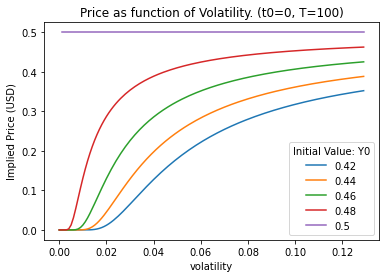

In [10]:
# Generate DataFrame
# * columns = Y0_values
# * rows = s_values

data = {}

for Y0_value in Y0_values:
    
    data[Y0_value] = s_values.apply(lambda s_value: binary_price_sigma(Y0_value, s_value, t0, 10))
    
df = pd.DataFrame(data)
df.index = s_values

display(df)
ax = df.plot(title=f'Price as function of Volatility. (t0={t0}, T={T})',
             ylabel='Implied Price (USD)');
ax.legend(title='Initial Value: Y0');